In [1]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [2]:
# importing csv and adding new columns

column_headers = ['Edibility', 'Cap Shape', 'Cap Surface', 'Cap Color', 'Bruises', 'Odor', 'Gill Attachment', 'Gill Spacing',
                  'Gill Size', 'Gill Color', 'Stalk Shape', 'Stalk Root', 'Stalk Surface Above Ring', 'Stalk Surface Below Ring',
                  'Stalk Color Above Ring', 'Stalk Color Below Ring', 'Veil Type', 'Veil Color', 'Ring Number', 'Ring Type',
                  'Spore Print Color', 'Population', 'Habitat']

mushrooms_df = pd.read_csv("mushroom_data.csv", names=column_headers, header=None)

mushrooms_df.dropna(inplace=False)
mushrooms_df

unique_vals = mushrooms_df['Cap Color'].unique()

print(unique_vals)
mushrooms_df

['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']


,Edibility,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# encodes the labels to make them readable in the plot as numerical values
label_encoder = LabelEncoder()
mushrooms_df_encoded = mushrooms_df.apply(label_encoder.fit_transform)
mushrooms_df_encoded

,Edibility,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [4]:
unique_vals = mushrooms_df['Edibility'].value_counts()
unique_vals

e    4208
p    3916
Name: Edibility, dtype: int64

In [12]:
# makes the letters into numbers

X = mushrooms_df_encoded[['Cap Shape', 'Cap Surface', 'Cap Color', "Gill Size", "Veil Color"]]
y = mushrooms_df_encoded['Edibility']

mush_train, mush_test = train_test_split(mushrooms_df_encoded, test_size=0.2, random_state=123)


X_mush_train = mush_train[['Cap Shape', 'Cap Surface', 'Cap Color', "Gill Size", "Veil Color"]]
y_mush_train = mush_train['Edibility']

# make dummy variables w onehot
categorical_columns = ['Cap Shape', 'Cap Surface', 'Cap Color', "Veil Color"]
numerical_columns = ["Gill Size"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
mush_preprocessor = make_column_transformer((categorical_transformer, categorical_columns),)


#### KNeighbors
knn_spec = KNeighborsClassifier(n_neighbors=3, weights="distance")
#classifier.fit(X_train_preprocessed, y_train)

mush_fit = make_pipeline(mush_preprocessor, knn_spec).fit(X_mush_train, y_mush_train)
mush_fit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cap Shape', 'Cap Surface',
                                                   'Cap Color',
                                                   'Veil Color'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [26]:
# new predicted column
mush_test_predictions = mush_fit.predict(mush_test[['Cap Shape', 'Cap Surface', 'Cap Color', "Gill Size", "Veil Color"]])
mush_test_predictions = pd.concat(
    [
        mush_test[['Edibility', 
                   'Cap Shape', 
                   'Cap Surface', 
                   'Cap Color', 
                   "Gill Size", 
                   "Veil Color"]].reset_index(drop=True),
        pd.DataFrame(mush_test_predictions, columns=["Predicted"]),
    ],
    axis=1,
)

mush_test_predictions.iloc[5,:]
mush_test_predictions

,Edibility,Cap Shape,Cap Surface,Cap Color,Gill Size,Veil Color,Predicted
0,0,0,2,8,0,2,0
1,0,5,3,2,0,2,1
2,0,3,3,0,0,2,0
3,1,5,0,9,0,2,1
4,0,5,3,3,0,2,1
...,...,...,...,...,...,...,...
1620,1,5,2,0,0,2,1
1621,1,5,0,9,0,2,1
1622,0,5,0,3,0,2,1
1623,0,0,3,9,0,2,0


In [27]:
#X_test = mush_test_predictions[['Cap Shape', 'Cap Surface', 'Cap Color', 'Gill Size', 'Veil Color']]
#y_test = mush_test_predictions["Edibility"]

mush_prediction_accuracy = mush_fit.score(X_mush_test, y_mush_test)
mush_prediction_accuracy

0.676923076923077

In [19]:
mush_test_predictions.isna().sum()

Edibility                   0
Cap Shape                   0
Cap Surface                 0
Cap Color                   0
Bruises                     0
Odor                        0
Gill Attachment             0
Gill Spacing                0
Gill Size                   0
Gill Color                  0
Stalk Shape                 0
Stalk Root                  0
Stalk Surface Above Ring    0
Stalk Surface Below Ring    0
Stalk Color Above Ring      0
Stalk Color Below Ring      0
Veil Type                   0
Veil Color                  0
Ring Number                 0
Ring Type                   0
Spore Print Color           0
Population                  0
Habitat                     0
Predicted                   0
dtype: int64

In [20]:
X_mush_test.isna().sum()

Cap Shape      0
Cap Surface    0
Cap Color      0
Gill Size      0
Veil Color     0
dtype: int64

In [21]:
X_mush_train.isna().sum()

Cap Shape      0
Cap Surface    0
Cap Color      0
Gill Size      0
Veil Color     0
dtype: int64

In [24]:
mush_matrix = confusion_matrix(
    mush_test_predictions["Edibility"],  # true labels
    mush_test_predictions["Predicted"],  # predicted labels
    labels=mush_fit.classes_,           # specify the label for each class
)
mush_matrix

array([[502, 361],
       [164, 598]])

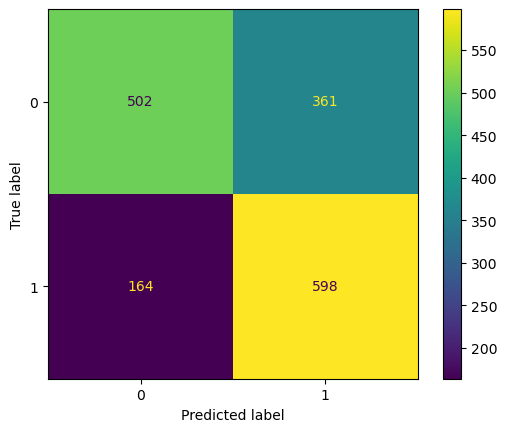

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=mush_matrix, display_labels=mush_fit.classes_
)
disp.plot()

In [ ]:
#mush_test_predictions["Edibility"]
X_mush_test.isna().sum()